In [1]:
# Add the dependencies
import pandas as pd
import os

In [2]:
# Files to load
df_week1_to_load = os.path.join("resources", "df_week1.csv")

In [3]:
# Read the csv data file and store it in a Pandas DataFrame.
df_week1 = pd.read_csv(df_week1_to_load)
df_week1

,Unnamed: 0,customer_id,product_id,product_title,product_category,review_date,review_year
0,0,13682848,B001GRNO68,ORE International Black 4 Panel Plum Blossom S...,Furniture,2010-12-31,2010
1,1,52516035,B003QCJHMQ,"Winsome Wood Portland Umbrella Stand, Cappuccina",Furniture,2010-12-31,2010
2,2,19360779,B0012LYSG8,Tenley Occasional Table Set,Furniture,2010-12-31,2010
3,3,11362249,B000IHJF60,Tot Tutors WO697 Friends Collection Kids Book ...,Furniture,2010-12-31,2010
4,4,40561072,B001NMSD9Y,ITALMODERN Veronica Monitor Cart; Orange,Furniture,2010-12-31,2010
...,...,...,...,...,...,...,...
442620,442620,14371548,B000LSUW6S,Braun Oral-B Sonic Complete Replacement Brushe...,Personal_Care_Appliances,2010-01-01,2010
442621,442621,14812612,B001BYYCHQ,Walker or Wheelchair Bag,Personal_Care_Appliances,2010-01-01,2010
442622,442622,13572974,B0013RQP08,Exergen temporal thermometer,Personal_Care_Appliances,2010-01-01,2010
442623,442623,14395064,B001AHM29Y,Snore Stopper - Self-Adhesive Electrodes (1 pa...,Personal_Care_Appliances,2010-01-01,2010


In [4]:
# Each row will represent bough QTY = 1
df_week1["Quantity"] = 1
df_week1

,Unnamed: 0,customer_id,product_id,product_title,product_category,review_date,review_year,Quantity
0,0,13682848,B001GRNO68,ORE International Black 4 Panel Plum Blossom S...,Furniture,2010-12-31,2010,1
1,1,52516035,B003QCJHMQ,"Winsome Wood Portland Umbrella Stand, Cappuccina",Furniture,2010-12-31,2010,1
2,2,19360779,B0012LYSG8,Tenley Occasional Table Set,Furniture,2010-12-31,2010,1
3,3,11362249,B000IHJF60,Tot Tutors WO697 Friends Collection Kids Book ...,Furniture,2010-12-31,2010,1
4,4,40561072,B001NMSD9Y,ITALMODERN Veronica Monitor Cart; Orange,Furniture,2010-12-31,2010,1
...,...,...,...,...,...,...,...,...
442620,442620,14371548,B000LSUW6S,Braun Oral-B Sonic Complete Replacement Brushe...,Personal_Care_Appliances,2010-01-01,2010,1
442621,442621,14812612,B001BYYCHQ,Walker or Wheelchair Bag,Personal_Care_Appliances,2010-01-01,2010,1
442622,442622,13572974,B0013RQP08,Exergen temporal thermometer,Personal_Care_Appliances,2010-01-01,2010,1
442623,442623,14395064,B001AHM29Y,Snore Stopper - Self-Adhesive Electrodes (1 pa...,Personal_Care_Appliances,2010-01-01,2010,1


In [5]:
# Print out the Product value counts
# Too many products to create table
product_counts = df_week1.product_id.value_counts()
product_counts

B002GP7Z6Y    1242
B002O3W4LE     870
B0032AN4M6     780
B001VD5E3S     606
B001R4C5BK     591
              ... 
B00068VBBS       1
B001FKKBQC       1
B00286KNPG       1
B003ULNSGE       1
B003R28VCW       1
Name: product_id, Length: 108486, dtype: int64

<AxesSubplot:ylabel='Density'>

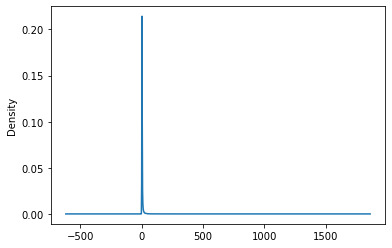

In [6]:
# Visualize the value counts
product_counts.plot.density()

In [8]:
# Determine which values to replace
replace_product = list(product_counts[product_counts < 500].index)

# Replace in DataFrame
for product in replace_product:
    df_week1.product_id = df_week1.product_id.replace(product,"Other")

# Check to make sure binning was successful
df_week1.product_id.value_counts()

Other         437946
B002GP7Z6Y      1242
B002O3W4LE       870
B0032AN4M6       780
B001VD5E3S       606
B001R4C5BK       591
B001LYFBHG       590
Name: product_id, dtype: int64

In [10]:
df_simplified = df_week1[df_week1.product_id != "Other"]
df_simplified

,Unnamed: 0,customer_id,product_id,product_title,product_category,review_date,review_year,Quantity
33529,33529,30941207,B001VD5E3S,(3 Packs) Clear LCD Screen Protector for Amazo...,Office Products,2010-12-31,2010,1
33549,33549,50291534,B0032AN4M6,Canon PIXMA MX870 Wireless Office All-in-One P...,Office Products,2010-12-31,2010,1
33588,33588,50220714,B0032AN4M6,Canon PIXMA MX870 Wireless Office All-in-One P...,Office Products,2010-12-31,2010,1
33619,33619,38423306,B0032AN4M6,Canon PIXMA MX870 Wireless Office All-in-One P...,Office Products,2010-12-31,2010,1
33638,33638,15650229,B002O3W4LE,Ooma Telo Free Home Phone Service,Office Products,2010-12-31,2010,1
...,...,...,...,...,...,...,...,...
423454,423454,33199190,B001R4C5BK,Canon PIXMA MX860 Wireless All-In-One office P...,Office Products,2010-01-01,2010,1
423463,423463,14391632,B002GP7Z6Y,Canon PIXMA MP560 Wireless Inkjet All-In-One P...,Office Products,2010-01-01,2010,1
423494,423494,52476915,B002GP7Z6Y,Canon PIXMA MP560 Wireless Inkjet All-In-One P...,Office Products,2010-01-01,2010,1
423501,423501,53075795,B002GP7Z6Y,Canon PIXMA MP560 Wireless Inkjet All-In-One P...,Office Products,2010-01-01,2010,1


In [11]:
# Consolidate the items into 1 transaction per row with each product

apriori_table = df_week1.groupby(["customer_id","product_id"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("customer_id")
apriori_table

product_id,B001LYFBHG,B001R4C5BK,B001VD5E3S,B002GP7Z6Y,B002O3W4LE,B0032AN4M6,Other
customer_id,,,,,,,
9873172,0.0,0.0,0.0,0.0,0.0,0.0,6.0
9873203,0.0,0.0,0.0,0.0,0.0,0.0,6.0
9873230,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9873493,0.0,0.0,0.0,0.0,0.0,0.0,3.0
9873503,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...
53096389,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53096411,0.0,0.0,0.0,0.0,0.0,0.0,5.0
53096454,0.0,0.0,0.0,0.0,0.0,0.0,1.0
